In [ ]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


# Additional library
import os
import re
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
!pip install google-trans-new
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=3018b5174d7fb3b01b329934efa0642ed8ea7fe48c8a74d937dbd27761df39a0
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_1 = pd.read_excel('/content/drive/My Drive/Skripsi/Data Crawling Syiah.xlsx')
df_2 = pd.read_excel('/content/drive/My Drive/Skripsi/Data Crawling Syiah Indonesia.xlsx')
df_3 = pd.read_excel('/content/drive/My Drive/Skripsi/Data Crawling Kafir.xlsx')
df_4 = pd.read_excel('/content/drive/My Drive/Skripsi/Data Crawling Sesat.xlsx')
df_5 = pd.read_excel('/content/drive/My Drive/Skripsi/Data Crawling Diluar Islam.xlsx')
df_6 = pd.read_excel('/content/drive/My Drive/Skripsi/Data Crawling Islam.xlsx')
df_7 = pd.read_excel('/content/drive/My Drive/Skripsi/Data Crawling Masih Islam.xlsx')


In [ ]:
#merge dataset
frames = [df_1, df_2, df_3, df_4, df_5, df_6, df_7]
df = pd.concat(frames)

#replace column's name
df = df.rename(columns={"pengguna" :"pengguna", "tweet": "tweet"})
df = df[['pengguna','tweet']]
df.head()

,pengguna,tweet
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ..."


data cleansing process including Removing Punctuation inside

In [ ]:
def cleansing(text):
    text = ' '.join(re.sub("[@#][A-Za-z0-9_]+|([^0-9A-Za-z \t])|(\w+:\/\/\S+)+|^https?:\/\/.*[\r\n]*"," ", text).split(' '))
    text = re.sub(r"\d+", "", text)
    text = ' '.join(text.split())
    return text


In [ ]:
list_tweet = list()
for index, row in df.iterrows():
    _tweet = row['tweet']
    # _tweet = caseFolding(_tweet)
    _tweet = cleansing(_tweet)

    tmp_list = {
        #'id'          : row['id'],
        'pengguna'    : row['pengguna'],
        'tweet'       : row['tweet'],
        'clean_tweet' : _tweet
    }
    list_tweet.append(tmp_list)

df_list_tweet = pd.DataFrame(list_tweet)
df_list_tweet['clean_tweet']=df_list_tweet['clean_tweet'].replace(regex={'RT': ''})
df_list_tweet

,pengguna,tweet,clean_tweet
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...
...,...,...,...
255,akukash,RT @abuhafiz1: Masuk kedalam Kaabah adalah pel...,Masuk kedalam Kaabah adalah peluang nikmat ya...
256,hajardottcom,RT @abuhafiz1: Masuk kedalam Kaabah adalah pel...,Masuk kedalam Kaabah adalah peluang nikmat ya...
257,azrylzul16,RT @abuhafiz1: Masuk kedalam Kaabah adalah pel...,Masuk kedalam Kaabah adalah peluang nikmat ya...
258,zvvko,RT @abuhafiz1: Masuk kedalam Kaabah adalah pel...,Masuk kedalam Kaabah adalah peluang nikmat ya...


In [ ]:
# Menghilangkan tweet yang sama dari data hasil cleansing
new_list_tweet = df_list_tweet.drop_duplicates(subset=['clean_tweet'])
print('Total tweet sebelum sebelum duplicate :', len(df_list_tweet))
print('Total tweet sesudah sesudah remove duplicate :', len(new_list_tweet))

df_new_list_tweet = pd.DataFrame(new_list_tweet)
df_new_list_tweet

Total tweet sebelum sebelum duplicate : 260
Total tweet sesudah sesudah remove duplicate : 94


,pengguna,tweet,clean_tweet
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...
...,...,...,...
231,wahyu_djanti88,@JanissaryD_Last @islah_bahrawi @tni_ad Kaum l...,Kaum liberal syiah atheis setengah mateng teru...
232,theonlyoneLhMY,RT @KulupFans: Pihak jabatan agama islam Johor...,Pihak jabatan agama islam Johor dah boleh kut...
239,infoahlulbait,Doa Hari Ke-6 Ramadhan\n\n#Islam #Doa #Ramadha...,Doa Hari Ke Ramadhan
240,boothefooo,@satrio_em @James_Al_Murtad @agniasambara Tanp...,Tanpa bermaksud belain mba nya ataupun belain ...


In [ ]:
df_new_list_tweet.to_excel('/content/drive/My Drive/Skripsi/df_new_list_tweet_mei.xlsx')

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Contoh eng to ind
from googletrans import Translator
translator = Translator()
translator.translate('This sentence is written in English', dest='id').text

'Kalimat ini ditulis dalam bahasa Inggris'

In [ ]:
# Contoh ind to eng
from googletrans import Translator
translator = Translator()
translator.translate('Kalimat ini ditulis dalam bahasa Inggris', dest='en').text

'This sentence is written in English'

In [ ]:
translated_data = df_new_list_tweet
translated_data.head()

,pengguna,tweet,clean_tweet
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...


In [ ]:
#translate tweets to English
from googletrans import Translator
translator = Translator()

translations = []

for i in translated_data.index:
  translated = translator.translate(translated_data.clean_tweet[i], dest='en').text
  translations.append(translated)

In [ ]:
# tampung hasil translate ke variable/dataframe translations
translations = pd.DataFrame(translations)

# gabungkan hasli translate kedalam data translated_data
translated_data['en_tweet'] = translations
translated_data

,pengguna,tweet,clean_tweet,en_tweet
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ..."
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v..."
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...
...,...,...,...,...
231,wahyu_djanti88,@JanissaryD_Last @islah_bahrawi @tni_ad Kaum l...,Kaum liberal syiah atheis setengah mateng teru...,NaN
232,theonlyoneLhMY,RT @KulupFans: Pihak jabatan agama islam Johor...,Pihak jabatan agama islam Johor dah boleh kut...,NaN
239,infoahlulbait,Doa Hari Ke-6 Ramadhan\n\n#Islam #Doa #Ramadha...,Doa Hari Ke Ramadhan,NaN
240,boothefooo,@satrio_em @James_Al_Murtad @agniasambara Tanp...,Tanpa bermaksud belain mba nya ataupun belain ...,NaN


In [ ]:
#export df_new_list_tweet to google drive
translated_data.to_excel('/content/drive/My Drive/Skripsi/Data Translated_mei.xlsx', index=False)

Data Pre-processing

In [ ]:
# Import Library
import pandas as pd
import numpy as np
!pip install nltk

In [ ]:
# word_tokenize library for tokenization process using nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

# library for process of pos-tagging, lemmatization and cleaning the stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer # pembobotan kemudian u/ menghitung polarity
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# additional library
# from scipy.spatial import distance
# from sklearn.metrics.pairwise import cosine_similarity

# nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sample_reviews = pd.read_excel('/content/drive/My Drive/Skripsi/Data Translated_mei.xlsx')

In [ ]:
df_corpus = sample_reviews
df_corpus.head()

,pengguna,tweet,clean_tweet,en_tweet
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ..."
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v..."
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...


In [ ]:
#konversi tweet ke LOWER CASE / CASE FOLDING
df_corpus['text'] = df_corpus['en_tweet'].str.lower()
# cek data null
# word_tokenize tidak akan jalan kalau data masih ada yang null
# data tweet null karena ada user yang tidak mention apapun

df_corpus.isnull().sum()

pengguna        0
tweet           0
clean_tweet     0
en_tweet       35
text           35
dtype: int64

In [ ]:
df_corpus.head(5)

,pengguna,tweet,clean_tweet,en_tweet,text
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ..."
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v..."
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...


In [ ]:
#drop data null
corpus = df_corpus.dropna()

#konversi tweet ke proses TOKENIZATION menggunakan word_tokenize
corpus['text_tokenized'] = corpus.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
corpus.head()

<ipython-input-25-2408a3f981df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['text_tokenized'] = corpus.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"[is, a, hoop, for, a, child, in, north, pakist..."
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"[i, do, n't, think, it, 's, muslim, but, shia,..."
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","[it, 's, been, a, year, since, the, invasion, ..."
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","[hopefully, ,, lastly, ,, before, being, suspe..."
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"[wkwkwk, even, though, the, saudis, only, back..."


In [ ]:
corpus.isnull().sum()

pengguna          0
tweet             0
clean_tweet       0
en_tweet          0
text              0
text_tokenized    0
dtype: int64

POS-TAGGING

In [ ]:
# import nltk

# def tokenization(text):
#   sentence = nltk.sent_tokenize(text)
#   for sent in sentence:
#     pos_tagging = nltk.pos_tag(nltk.word_tokenize(sent))
#     print(pos_tagging)

# looping = corpus['text']
# for text in looping:
#   tokenization(text)
#create function for pos-tagging
import nltk

def tokenization(text):
  sentence = nltk.sent_tokenize(text)
  for sent in sentence:
    pos_tagging = nltk.pos_tag(nltk.word_tokenize(sent))
  return pos_tagging

array_baru = []
looping = corpus['text']
for text in looping:
  array_baru.append(tokenization(text))
#print(array_baru)

#apply function for pos-tagging
corpus['text_tagging']  = array_baru


<ipython-input-27-b77e7491f7ca>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['text_tagging']  = array_baru


In [ ]:
corpus.head()

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"[is, a, hoop, for, a, child, in, north, pakist...","[(is, VBZ), (a, DT), (hoop, NN), (for, IN), (a..."
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"[i, do, n't, think, it, 's, muslim, but, shia,...","[(i, NNS), (do, VBP), (n't, RB), (think, VB), ..."
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","[it, 's, been, a, year, since, the, invasion, ...","[(it, PRP), ('s, VBZ), (been, VBN), (a, DT), (..."
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","[hopefully, ,, lastly, ,, before, being, suspe...","[(hopefully, RB), (,, ,), (lastly, RB), (,, ,)..."
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"[wkwkwk, even, though, the, saudis, only, back...","[(wkwkwk, NN), (even, RB), (though, IN), (the,..."


STOPWORD

In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#create function removing stopword
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean

#apply function for removing stopword
corpus['text_stopword'] = corpus['text_tokenized'].apply(lambda x: remove_stopwords(x))

<ipython-input-30-a180ec132bad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['text_stopword'] = corpus['text_tokenized'].apply(lambda x: remove_stopwords(x))


In [ ]:
corpus.head()

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"[is, a, hoop, for, a, child, in, north, pakist...","[(is, VBZ), (a, DT), (hoop, NN), (for, IN), (a...","[hoop, child, north, pakistan, whose, parents,..."
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"[i, do, n't, think, it, 's, muslim, but, shia,...","[(i, NNS), (do, VBP), (n't, RB), (think, VB), ...","[n't, think, 's, muslim, shia, n't, surprised,..."
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","[it, 's, been, a, year, since, the, invasion, ...","[(it, PRP), ('s, VBZ), (been, VBN), (a, DT), (...","['s, year, since, invasion, yemen, ,, sunnah, ..."
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","[hopefully, ,, lastly, ,, before, being, suspe...","[(hopefully, RB), (,, ,), (lastly, RB), (,, ,)...","[hopefully, ,, lastly, ,, suspended, ,, 've, s..."
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"[wkwkwk, even, though, the, saudis, only, back...","[(wkwkwk, NN), (even, RB), (though, IN), (the,...","[wkwkwk, even, though, saudis, back, yemeni, g..."


STEMMING
Post Stemmer

In [ ]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps) # use stem function bellow

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [ ]:
#exaxmple steaming function
print(ps.stem('coder'))
print(ps.stem('codeing'))
print(ps.stem('code'))

coder
code
code


In [ ]:
#create function for stemming
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

#apply function for removing stopword
corpus['text_stemmed'] = corpus['text_stopword'].apply(lambda x: stemming(x))

<ipython-input-34-cd203cc59862>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['text_stemmed'] = corpus['text_stopword'].apply(lambda x: stemming(x))


In [ ]:
corpus.head()

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"[is, a, hoop, for, a, child, in, north, pakist...","[(is, VBZ), (a, DT), (hoop, NN), (for, IN), (a...","[hoop, child, north, pakistan, whose, parents,...","[hoop, child, north, pakistan, whose, parent, ..."
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"[i, do, n't, think, it, 's, muslim, but, shia,...","[(i, NNS), (do, VBP), (n't, RB), (think, VB), ...","[n't, think, 's, muslim, shia, n't, surprised,...","[n't, think, 's, muslim, shia, n't, surpris, s..."
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","[it, 's, been, a, year, since, the, invasion, ...","[(it, PRP), ('s, VBZ), (been, VBN), (a, DT), (...","['s, year, since, invasion, yemen, ,, sunnah, ...","['s, year, sinc, invas, yemen, ,, sunnah, shia..."
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","[hopefully, ,, lastly, ,, before, being, suspe...","[(hopefully, RB), (,, ,), (lastly, RB), (,, ,)...","[hopefully, ,, lastly, ,, suspended, ,, 've, s...","[hope, ,, lastli, ,, suspend, ,, 've, start, g..."
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"[wkwkwk, even, though, the, saudis, only, back...","[(wkwkwk, NN), (even, RB), (though, IN), (the,...","[wkwkwk, even, though, saudis, back, yemeni, g...","[wkwkwk, even, though, saudi, back, yemeni, go..."


LEMMATIZATION
WordNet Lemmatizer

In [ ]:
import nltk
wn = nltk.WordNetLemmatizer()

nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
dir(wn)

# use  'lemmatize',

[nltk_data] Downloading package wordnet to /root/nltk_data...


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [ ]:
#create function lemmatization
def lemmatization(token_txt):
  text = [wn.lemmatize(word) for word in token_txt]
  return text

#apply function to dataframe
corpus['text_lemmatized'] = corpus['text_stemmed'].apply(lambda x : lemmatization(x))

<ipython-input-37-3ea3ad637074>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['text_lemmatized'] = corpus['text_stemmed'].apply(lambda x : lemmatization(x))


In [ ]:
corpus

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"[is, a, hoop, for, a, child, in, north, pakist...","[(is, VBZ), (a, DT), (hoop, NN), (for, IN), (a...","[hoop, child, north, pakistan, whose, parents,...","[hoop, child, north, pakistan, whose, parent, ...","[hoop, child, north, pakistan, whose, parent, ..."
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"[i, do, n't, think, it, 's, muslim, but, shia,...","[(i, NNS), (do, VBP), (n't, RB), (think, VB), ...","[n't, think, 's, muslim, shia, n't, surprised,...","[n't, think, 's, muslim, shia, n't, surpris, s...","[n't, think, 's, muslim, shia, n't, surpris, s..."
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","[it, 's, been, a, year, since, the, invasion, ...","[(it, PRP), ('s, VBZ), (been, VBN), (a, DT), (...","['s, year, since, invasion, yemen, ,, sunnah, ...","['s, year, sinc, invas, yemen, ,, sunnah, shia...","['s, year, sinc, invas, yemen, ,, sunnah, shia..."
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","[hopefully, ,, lastly, ,, before, being, suspe...","[(hopefully, RB), (,, ,), (lastly, RB), (,, ,)...","[hopefully, ,, lastly, ,, suspended, ,, 've, s...","[hope, ,, lastli, ,, suspend, ,, 've, start, g...","[hope, ,, lastli, ,, suspend, ,, 've, start, g..."
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"[wkwkwk, even, though, the, saudis, only, back...","[(wkwkwk, NN), (even, RB), (though, IN), (the,...","[wkwkwk, even, though, saudis, back, yemeni, g...","[wkwkwk, even, though, saudi, back, yemeni, go...","[wkwkwk, even, though, saudi, back, yemeni, go..."
5,boothefooo,Ribetnya itu kan soalnya Quranist selalu ditod...,Ribetnya itu kan soalnya Quranist selalu ditod...,"It's complicated, because the Koranists are al...","it's complicated, because the koranists are al...","[it, 's, complicated, ,, because, the, koranis...","[(oh, UH), (,, ,), (if, IN), (you, PRP), (pray...","['s, complicated, ,, koranists, always, pointe...","['s, complic, ,, koranist, alway, point, ,, pr...","['s, complic, ,, koranist, alway, point, ,, pr..."
6,youdie_HIMMLER,RT @CeritaPuspa: Aku tuch orangnya gak pelit f...,Aku tuch orangnya gak pelit follow amp gak pe...,I'm not a stingy person following & not stingy...,i'm not a stingy person following & not stingy...,"[i, 'm, not, a, stingy, person, following, &, ...","[(i, NN), ('m, VBP), (not, RB), (a, DT), (stin...","['m, stingy, person, following, &, stingy, fol...","['m, stingi, person, follow, &, stingi, follba...","['m, stingi, person, follow, &, stingi, follba..."
7,roniandriska,RT @jandakembang78: @YandraD31 Ini tentara Syi...,Ini tentara Syiah nya Bashar al Assad Tp kela...,"This is Bashar al Assad's Shiite army, but Isr...","this is bashar al assad's shiite army, but isr...","[this, is, bashar, al, assad, 's, shiite, army...","[(this, DT), (is, VBZ), (bashar, JJ), (al, IN)...","[bashar, al, assad, 's, shiite, army, ,, israe...","[bashar, al, assad, 's, shiit, armi, ,, israel...","[bashar, al, assad, 's, shiit, armi, ,, israel..."
8,Bengkel_MP,"RT @infoahlulbait: Bulan Ramadhan, Kesempatan ...",Bulan Ramadhan Ke

In [ ]:
#Export
corpus.to_excel('/content/drive/My Drive/Skripsi/corpus_lemmatization_mei.xlsx',index=False)


Labeling dengan TextBlob

In [ ]:
import pandas as pd
import numpy as np
import csv
import re
from datetime import datetime

# menghitung sentimen kata-kata yang berbahasa inggris
from textblob import TextBlob

In [ ]:
corpus_2 = pd.read_excel('/content/drive/My Drive/Skripsi/corpus_lemmatization_mei.xlsx')
corpus_2.head()

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'..."
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""..."
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ..."
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","['hopefully', ',', 'lastly', ',', 'before', 'b...","[('hopefully', 'RB'), (',', ','), ('lastly', '...","['hopefully', ',', 'lastly', ',', 'suspended',...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...","['hope', ',', 'lastli', ',', 'suspend', ',', ""..."
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"['wkwkwk', 'even', 'though', 'the', 'saudis', ...","[('wkwkwk', 'NN'), ('even', 'RB'), ('though', ...","['wkwkwk', 'even', 'though', 'saudis', 'back',...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...","['wkwkwk', 'even', 'though', 'saudi', 'back', ..."


In [ ]:
#determine the polarity value from dataset
sample_reviews = corpus_2

def detect_polarity(text_lemmatized):
    return TextBlob(text_lemmatized).sentiment.polarity

sample_reviews['polarity'] = sample_reviews.text_lemmatized.apply(detect_polarity)
sample_reviews.head()

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.05
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.00
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.00
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","['hopefully', ',', 'lastly', ',', 'before', 'b...","[('hopefully', 'RB'), (',', ','), ('lastly', '...","['hopefully', ',', 'lastly', ',', 'suspended',...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...",0.00
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"['wkwkwk', 'even', 'though', 'the', 'saudis', ...","[('wkwkwk', 'NN'), ('even', 'RB'), ('though', ...","['wkwkwk', 'even', 'though', 'saudis', 'back',...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...",0.00


Seperti yang bisa dilihat pada source code diatas, attribute text_lemmatized yang akan dipilih untuk menentukan polarity.
Statement row dari attribute text_lemmatized akan menerima nilai index untuk statment polarity secara otomatis.
Nila polarity akan membantu dalam proses penentuan kelas label.

In [ ]:
#Membuat functionnya untuk memetakan label sentiment dari nilai polarity
def convert_label_category(row):
  if row['polarity'] > 0:
    return 'positif'
  elif row['polarity'] == 0:
    return 'netral'
  else:
    return 'negatif'

#Apply the function into dataframe
sample_reviews['label'] = sample_reviews.apply(convert_label_category,axis=1)
sample_reviews

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.050000,negatif
1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.000000,netral
2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.000000,netral
3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","['hopefully', ',', 'lastly', ',', 'before', 'b...","[('hopefully', 'RB'), (',', ','), ('lastly', '...","['hopefully', ',', 'lastly', ',', 'suspended',...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...",0.000000,netral
4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"['wkwkwk', 'even', 'though', 'the', 'saudis', ...","[('wkwkwk', 'NN'), ('even', 'RB'), ('though', ...","['wkwkwk', 'even', 'though', 'saudis', 'back',...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...",0.000000,netral
5,boothefooo,Ribetnya itu kan soalnya Quranist selalu ditod...,Ribetnya itu kan soalnya Quranist selalu ditod...,"It's complicated, because the Koranists are al...","it's complicated, because the koranists are al...","['it', ""'s"", 'complicated', ',', 'because', 't...","[('oh', 'UH'), (',', ','), ('if', 'IN'), ('you...","[""'s"", 'complicated', ',', 'koranists', 'alway...","[""'s"", 'complic', ',', 'koranist', 'alway', 'p...","[""'s"", 'complic', ',', 'koranist', 'alway', 'p...",-0.312500,negatif
6,youdie_HIMMLER,RT @CeritaPuspa: Aku tuch orangnya gak pelit f...,Aku tuch orangnya gak pelit follow amp gak pe...,I'm not a stingy person following & not stingy...,i'm not a stingy person following & not stingy...,"['i', ""'m"", 'not', 'a', 'stingy', 'person', 'f...","[('i', 'NN'), (""'m"", 'VBP'), ('not', 'RB'), ('...","[""'m"", 'stingy', 'person', 'following', '&', '...","[""'m"", 'stingi', 'person', 'follow', '&', 'sti...","[""'m"", 'stingi', 'person', 'follow', '&', 'sti...",0.000000,netral
7,roniandriska,RT @jandakembang78: @YandraD31 Ini tentara Syi...,Ini tentara Syiah nya Bashar al Assad Tp kela...,"This is Bashar al Assad's Shiite army, but Isr...","this is bashar al assad's shiite army, but isr...","['this', 'is', 'bashar', 'al', 'assad', ""'s"", ...","[('this', 'DT'), ('is', 'VBZ'), ('bashar', 'JJ...","['bashar', 'al', 'assad', ""'s"", 'shiite', 'arm..

In [ ]:
#Hasil dari penentuan kelas label dengan TextBlob
sample_reviews['label'].value_counts()

netral     32
positif    17
negatif    10
Name: label, dtype: int64

In [ ]:
sample_reviews[sample_reviews['label']=='negatif'].head(3)

,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label
0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.0500,negatif
5,boothefooo,Ribetnya itu kan soalnya Quranist selalu ditod...,Ribetnya itu kan soalnya Quranist selalu ditod...,"It's complicated, because the Koranists are al...","it's complicated, because the koranists are al...","['it', ""'s"", 'complicated', ',', 'because', 't...","[('oh', 'UH'), (',', ','), ('if', 'IN'), ('you...","[""'s"", 'complicated', ',', 'koranists', 'alway...","[""'s"", 'complic', ',', 'koranist', 'alway', 'p...","[""'s"", 'complic', ',', 'koranist', 'alway', 'p...",-0.3125,negatif
7,roniandriska,RT @jandakembang78: @YandraD31 Ini tentara Syi...,Ini tentara Syiah nya Bashar al Assad Tp kela...,"This is Bashar al Assad's Shiite army, but Isr...","this is bashar al assad's shiite army, but isr...","['this', 'is', 'bashar', 'al', 'assad', ""'s"", ...","[('this', 'DT'), ('is', 'VBZ'), ('bashar', 'JJ...","['bashar', 'al', 'assad', ""'s"", 'shiite', 'arm...","['bashar', 'al', 'assad', ""'s"", 'shiit', 'armi...","['bashar', 'al', 'assad', ""'s"", 'shiit', 'armi...",-0.7000,negatif


In [ ]:
#Export analisis sentiment dan pnentuan kelas label menggunakan text blob
sample_reviews.to_excel('/content/drive/My Drive/Skripsi/sample_reviews_Mei.xlsx',index=False)

**World Cloud**

In [ ]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

# import visualisasi untuk worldcloud
import seaborn as sns
import folium
from folium import plugins
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/My Drive/Skripsi/sample_reviews_gabungan.xlsx')
dfclean = df.copy()
dfclean.head(2)

,Unnamed: 0,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label
0,0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.05,negatif
1,1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.00,netral


In [ ]:
wc_negatif= dfclean[dfclean['label'] == 'negatif']
wc_negatif

,Unnamed: 0,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label
0,0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.050000,negatif
5,5,boothefooo,Ribetnya itu kan soalnya Quranist selalu ditod...,Ribetnya itu kan soalnya Quranist selalu ditod...,"It's complicated, because the Koranists are al...","it's complicated, because the koranists are al...","['it', ""'s"", 'complicated', ',', 'because', 't...","[('oh', 'UH'), (',', ','), ('if', 'IN'), ('you...","[""'s"", 'complicated', ',', 'koranists', 'alway...","[""'s"", 'complic', ',', 'koranist', 'alway', 'p...","[""'s"", 'complic', ',', 'koranist', 'alway', 'p...",-0.312500,negatif
7,7,roniandriska,RT @jandakembang78: @YandraD31 Ini tentara Syi...,Ini tentara Syiah nya Bashar al Assad Tp kela...,"This is Bashar al Assad's Shiite army, but Isr...","this is bashar al assad's shiite army, but isr...","['this', 'is', 'bashar', 'al', 'assad', ""'s"", ...","[('this', 'DT'), ('is', 'VBZ'), ('bashar', 'JJ...","['bashar', 'al', 'assad', ""'s"", 'shiite', 'arm...","['bashar', 'al', 'assad', ""'s"", 'shiit', 'armi...","['bashar', 'al', 'assad', ""'s"", 'shiit', 'armi...",-0.700000,negatif
20,20,cahyadiargo,"@lapconq Fun fact, memang pembangunannya didan...",Fun fact memang pembangunannya didanai kedubes...,I have repeatedly said that sparrows are not n...,i have repeatedly said that sparrows are not n...,"['i', 'have', 'repeatedly', 'said', 'that', 's...","[('bangkok', 'NN'), ('chickens', 'NNS'), ('are...","['repeatedly', 'said', 'sparrows', 'necessaril...","['repeatedli', 'said', 'sparrow', 'necessarili...","['repeatedli', 'said', 'sparrow', 'necessarili...",-0.300000,negatif
26,26,NaKazuHaNara,RT @univ_syiahkuala: Selamat bergabung di Univ...,Selamat bergabung di Universitas Syiah Kuala ...,"If you think Iran is Shia, then, according to ...","if you think iran is shia, then, according to ...","['if', 'you', 'think', 'iran', 'is', 'shia', '...","[('if', 'IN'), ('you', 'PRP'), ('think', 'VBP'...","['think', 'iran', 'shia', ',', ',', 'according...","['think', 'iran', 'shia', ',', ',', 'accord', ...","['think', 'iran', 'shia', ',', ',', 'accord', ...",-0.107143,negatif
27,27,mahharulismail,@kismath90 Semoga Allah lakhnat puak2 SYIAH ce...,Semoga Allah lakhnat puak SYIAH celaka ni,When the Shia says that even his own family is...,when the shia says that even his own family is...,"['when', 'the', 'shia', 'says', 'that', 'even'...","[('when', 'WRB'), ('the', 'DT'), ('shia', 'NN'...","['shia', 'says', 'even', 'family', 'broken']","['shia', 'say', 'even', 'famili', 'broken']","['shia', 'say', 'even', 'famili', 'broken']",-0.400000,negatif
28,28,pakhabib98,"Syiah wahabi bergaduh, yang terpalit adalah or...",Syiah wahabi bergaduh yang terpalit adalah ora...,"Ah, he's unstable. As long as we follow each o...","ah, he's unstable. as long as we follow each o...","['ah', ',', 'he', ""'s"", 'unstable', '.', 'as',...","[('as', 'RB'), ('long', 'RB'), ('as', 'IN'), (...","['ah', ',', ""'s"", 'unstable', '.', 'long', 'fo...","['ah', ',', ""'s"", 'unstabl', '.', 'long', 'fol...","['ah', ',', ""'s"", 'unstabl', '.', 'long', 'fol...",-0.050000,negatif
32,32,Kwangwung5,@pengarang_sajak Donasi ke palestine beli bara...,Donasi ke palestine beli barang nya di israel ...,What made you try really hard until today?,what made you try really hard until today?,"['what', 'made', 'you', 'try', 'really', 'hard...","[('what', 'WP'), ('made', 'VBD'), ('you', 'PRP...","['made', 'try', 'really', 'hard', 'today', '?']","['made', 'tri', 're

In [ ]:
!pip install treebank
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

True

In [ ]:
import treebank
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
TreebankWordDetokenizer().detokenize(['the', 'quick', 'brown'])
'The quick brown'

'The quick brown'

In [ ]:
# cleansing
dfclean['text_lemmatized_clean2'] = dfclean['text_lemmatized'].replace({'\'':''})

In [ ]:
# # detokenize
treebank = TreebankWordDetokenizer()

dfclean['text_lemmatized_clean']= ''
for i in dfclean.index:
  dfclean['text_lemmatized_clean'][i]=treebank.detokenize(dfclean['text_stopword'][i])

dfclean

<ipython-input-37-1341b5e6c48c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfclean['text_lemmatized_clean'][i]=treebank.detokenize(dfclean['text_stopword'][i])


,Unnamed: 0,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label,text_lemmatized_clean2,text_lemmatized_clean
0,0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.05,negatif,"['hoop', 'child', 'north', 'pakistan', 'whose'...","[' h o o p', ' c h i l d', ' n o r t h', ' ..."
1,1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.00,netral,"[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","["" n' t "", ' t h i n k', ""' s "", ' m u s l..."
2,2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.00,netral,"[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""' s "", ' y e a r', ' s i n c e', ' i n v ..."
3,3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","['hopefully', ',', 'lastly', ',', 'before', 'b...","[('hopefully', 'RB'), (',', ','), ('lastly', '...","['hopefully', ',', 'lastly', ',', 'suspended',...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...",0.00,netral,"['hope', ',', 'lastli', ',', 'suspend', ',', ""...","[' h o p e f u l l y', ',', ' l a s t l y', ..."
4,4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"['wkwkwk', 'even', 'though', 'the', 'saudis', ...","[('wkwkwk', 'NN'), ('even', 'RB'), ('though', ...","['wkwkwk', 'even', 'though', 'saudis', 'back',...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...",0.00,netral,"['wkwkwk', 'even', 'though', 'saudi', 'back', ...","[' w k w k w k', ' e v e n', ' t h o u g h',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,54,AliefMohamad,Apa la yang menyebabkan anda try hard sangat s...,Apa la yang menyebabkan anda try hard sangat s...,The archipelago is the two islands of Sumatra ...,the archipelago is the two islands of sumatra ...,"['the', 'archipelago', 'is', 'the', 'two', 'is...","[('the', 'DT'), ('archipelago', 'NN'), ('is', ...","['archipelago', 'two', 'islands', 'sumatra', '...","['archipelago', 'two', 'island', 'sumatra', 'j...","['archipelago', 'two', 'island', 'sumatra', 'j...",0.00,netral,"['archipelago', 'two', 'island', 'sumatra', 'j...","[' a r c h i p e l a g o', ' t w o', ' i s l..."
114,55,hazsunny,RT @abuhafiz1: Masuk kedalam Kaabah adalah pel...,Masuk kedalam Kaabah adalah peluang nikmat ya...,Shia is not Muslim,shia is not muslim,"[

In [ ]:
dfclean.head()

,Unnamed: 0,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label,text_lemmatized_clean2,text_lemmatized_clean
0,0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.05,negatif,"['hoop', 'child', 'north', 'pakistan', 'whose'...","[' h o o p', ' c h i l d', ' n o r t h', ' ..."
1,1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.00,netral,"[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","["" n' t "", ' t h i n k', ""' s "", ' m u s l..."
2,2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.00,netral,"[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""' s "", ' y e a r', ' s i n c e', ' i n v ..."
3,3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","['hopefully', ',', 'lastly', ',', 'before', 'b...","[('hopefully', 'RB'), (',', ','), ('lastly', '...","['hopefully', ',', 'lastly', ',', 'suspended',...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...",0.00,netral,"['hope', ',', 'lastli', ',', 'suspend', ',', ""...","[' h o p e f u l l y', ',', ' l a s t l y', ..."
4,4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"['wkwkwk', 'even', 'though', 'the', 'saudis', ...","[('wkwkwk', 'NN'), ('even', 'RB'), ('though', ...","['wkwkwk', 'even', 'though', 'saudis', 'back',...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...",0.00,netral,"['wkwkwk', 'even', 'though', 'saudi', 'back', ...","[' w k w k w k', ' e v e n', ' t h o u g h',..."


In [ ]:
wc_negatif= dfclean[dfclean['label'] == 'negatif']
wc_negatif

,Unnamed: 0,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label,text_lemmatized_clean2,text_lemmatized_clean
0,0,towongsing,RT @pengarang_sajak: Adakah simpati utk anak2 ...,Adakah simpati utk anak di Utara Pakistan yg ...,Is a hoop for a child in North Pakistan whose ...,is a hoop for a child in north pakistan whose ...,"['is', 'a', 'hoop', 'for', 'a', 'child', 'in',...","[('is', 'VBZ'), ('a', 'DT'), ('hoop', 'NN'), (...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...","['hoop', 'child', 'north', 'pakistan', 'whose'...",-0.050000,negatif,"['hoop', 'child', 'north', 'pakistan', 'whose'...","[' h o o p', ' c h i l d', ' n o r t h', ' ..."
5,5,boothefooo,Ribetnya itu kan soalnya Quranist selalu ditod...,Ribetnya itu kan soalnya Quranist selalu ditod...,"It's complicated, because the Koranists are al...","it's complicated, because the koranists are al...","['it', ""'s"", 'complicated', ',', 'because', 't...","[('oh', 'UH'), (',', ','), ('if', 'IN'), ('you...","[""'s"", 'complicated', ',', 'koranists', 'alway...","[""'s"", 'complic', ',', 'koranist', 'alway', 'p...","[""'s"", 'complic', ',', 'koranist', 'alway', 'p...",-0.312500,negatif,"[""'s"", 'complic', ',', 'koranist', 'alway', 'p...","[""' s "", ' c o m p l i c a t e d', ',', ' k..."
7,7,roniandriska,RT @jandakembang78: @YandraD31 Ini tentara Syi...,Ini tentara Syiah nya Bashar al Assad Tp kela...,"This is Bashar al Assad's Shiite army, but Isr...","this is bashar al assad's shiite army, but isr...","['this', 'is', 'bashar', 'al', 'assad', ""'s"", ...","[('this', 'DT'), ('is', 'VBZ'), ('bashar', 'JJ...","['bashar', 'al', 'assad', ""'s"", 'shiite', 'arm...","['bashar', 'al', 'assad', ""'s"", 'shiit', 'armi...","['bashar', 'al', 'assad', ""'s"", 'shiit', 'armi...",-0.700000,negatif,"['bashar', 'al', 'assad', ""'s"", 'shiit', 'armi...","[' b a s h a r', ' a l', ' a s s a d', ""' ..."
20,20,cahyadiargo,"@lapconq Fun fact, memang pembangunannya didan...",Fun fact memang pembangunannya didanai kedubes...,I have repeatedly said that sparrows are not n...,i have repeatedly said that sparrows are not n...,"['i', 'have', 'repeatedly', 'said', 'that', 's...","[('bangkok', 'NN'), ('chickens', 'NNS'), ('are...","['repeatedly', 'said', 'sparrows', 'necessaril...","['repeatedli', 'said', 'sparrow', 'necessarili...","['repeatedli', 'said', 'sparrow', 'necessarili...",-0.300000,negatif,"['repeatedli', 'said', 'sparrow', 'necessarili...","[' r e p e a t e d l y', ' s a i d', ' s p a..."
26,26,NaKazuHaNara,RT @univ_syiahkuala: Selamat bergabung di Univ...,Selamat bergabung di Universitas Syiah Kuala ...,"If you think Iran is Shia, then, according to ...","if you think iran is shia, then, according to ...","['if', 'you', 'think', 'iran', 'is', 'shia', '...","[('if', 'IN'), ('you', 'PRP'), ('think', 'VBP'...","['think', 'iran', 'shia', ',', ',', 'according...","['think', 'iran', 'shia', ',', ',', 'accord', ...","['think', 'iran', 'shia', ',', ',', 'accord', ...",-0.107143,negatif,"['think', 'iran', 'shia', ',', ',', 'accord', ...","[' t h i n k', ' i r a n', ' s h i a', ',',..."
27,27,mahharulismail,@kismath90 Semoga Allah lakhnat puak2 SYIAH ce...,Semoga Allah lakhnat puak SYIAH celaka ni,When the Shia says that even his own family is...,when the shia says that even his own family is...,"['when', 'the', 'shia', 'says', 'that', 'even'...","[('when', 'WRB'), ('the', 'DT'), ('shia', 'NN'...","['shia', 'says', 'even', 'family', 'broken']","['shia', 'say', 'even', 'famili', 'broken']","['shia', 'say', 'even', 'famili', 'broken']",-0.400000,negatif,"['shia', 'say', 'even', 'famili', 'broken']","[' s h i a', ' s a y s', ' e v e n', ' f a ..."
28,28,pakhabib98,"Syiah wahabi bergaduh, yang terpalit adalah or...",Syiah wahabi bergaduh yang terpalit adalah ora...,"Ah, he's unstable. As long as we follow each o...","ah, he's unstable. as long as we follow each o...","['ah', ','

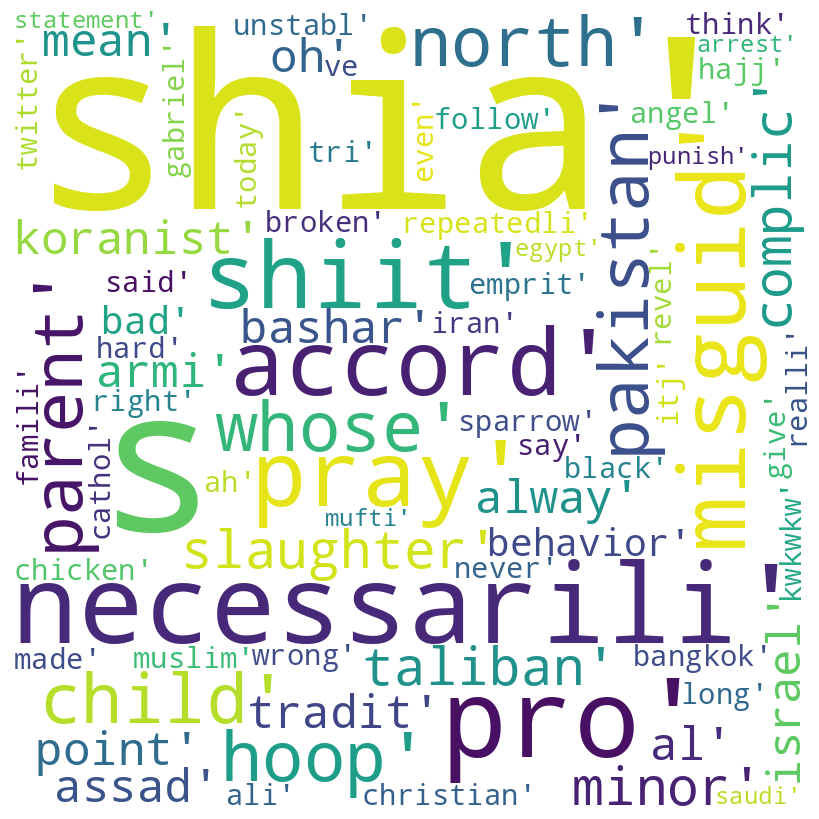

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in wc_negatif.text_lemmatized_clean2:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
rel_freq=wordcloud.words_
#rel_freq

list(rel_freq.items())[:]

[("shia'", 1.0),
 ('s', 0.6666666666666666),
 ("necessarili'", 0.5),
 ("pro'", 0.5),
 ("shiit'", 0.3333333333333333),
 ("pray'", 0.3333333333333333),
 ("accord'", 0.3333333333333333),
 ("misguid'", 0.3333333333333333),
 ("hoop'", 0.16666666666666666),
 ("child'", 0.16666666666666666),
 ("north'", 0.16666666666666666),
 ("pakistan'", 0.16666666666666666),
 ("whose'", 0.16666666666666666),
 ("parent'", 0.16666666666666666),
 ("slaughter'", 0.16666666666666666),
 ("taliban'", 0.16666666666666666),
 ("minor'", 0.16666666666666666),
 ("complic'", 0.16666666666666666),
 ("koranist'", 0.16666666666666666),
 ("alway'", 0.16666666666666666),
 ("point'", 0.16666666666666666),
 ("oh'", 0.16666666666666666),
 ("tradit'", 0.16666666666666666),
 ("mean'", 0.16666666666666666),
 ("bashar'", 0.16666666666666666),
 ("al'", 0.16666666666666666),
 ("assad'", 0.16666666666666666),
 ("armi'", 0.16666666666666666),
 ("israel'", 0.16666666666666666),
 ("behavior'", 0.16666666666666666),
 ("bad'", 0.166666666

In [ ]:
wc_positif= dfclean[dfclean['label'] == 'positif']
wc_positif

,Unnamed: 0,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label,text_lemmatized_clean2,text_lemmatized_clean
8,8,Bengkel_MP,"RT @infoahlulbait: Bulan Ramadhan, Kesempatan ...",Bulan Ramadhan Kesempatan Terbaik Berdamai de...,The month of Ramadhan is the best opportunity ...,the month of ramadhan is the best opportunity ...,"['the', 'month', 'of', 'ramadhan', 'is', 'the'...","[('allah', 'NN'), ('swt', 'NN'), ('in', 'IN'),...","['month', 'ramadhan', 'best', 'opportunity', '...","['month', 'ramadhan', 'best', 'opportun', 'mak...","['month', 'ramadhan', 'best', 'opportun', 'mak...",1.000000,positif,"['month', 'ramadhan', 'best', 'opportun', 'mak...","[' m o n t h', ' r a m a d h a n', ' b e s t..."
9,9,Bengkel_MP,RT @infoahlulbait: Imam Ali Zainal Abidin dan ...,Imam Ali Zainal Abidin dan Hak Puasa Imam Ali...,Imam Ali Zainal Abidin and the Right to Fast I...,imam ali zainal abidin and the right to fast i...,"['imam', 'ali', 'zainal', 'abidin', 'and', 'th...","[('imam', 'NN'), ('ali', 'VBZ'), ('zainal', 'J...","['imam', 'ali', 'zainal', 'abidin', 'right', '...","['imam', 'ali', 'zainal', 'abidin', 'right', '...","['imam', 'ali', 'zainal', 'abidin', 'right', '...",0.234286,positif,"['imam', 'ali', 'zainal', 'abidin', 'right', '...","[' i m a m', ' a l i', ' z a i n a l', ' a ..."
10,10,Bengkel_MP,RT @SafinahOnline: Doa Ramadhan Hari ke 6\n_\n...,Doa Ramadhan Hari ke Baca selengkapnya Selama...,Ramadhan Day Prayer Read in full Enjoy reading...,ramadhan day prayer read in full enjoy reading...,"['ramadhan', 'day', 'prayer', 'read', 'in', 'f...","[('ramadhan', 'JJ'), ('day', 'NN'), ('prayer',...","['ramadhan', 'day', 'prayer', 'read', 'full', ...","['ramadhan', 'day', 'prayer', 'read', 'full', ...","['ramadhan', 'day', 'prayer', 'read', 'full', ...",0.375000,positif,"['ramadhan', 'day', 'prayer', 'read', 'full', ...","[' r a m a d h a n', ' d a y', ' p r a y e r..."
13,13,Bengkel_MP,RT @infoahlulbait: Imam Ali bin Abi Thalib as ...,Imam Ali bin Abi Thalib as berkata Berpuasa i...,Imam Ali bin Abi Talib as said Fasting is not ...,imam ali bin abi talib as said fasting is not ...,"['imam', 'ali', 'bin', 'abi', 'talib', 'as', '...","[('imam', 'NN'), ('ali', 'NN'), ('bin', 'NN'),...","['imam', 'ali', 'bin', 'abi', 'talib', 'said',...","['imam', 'ali', 'bin', 'abi', 'talib', 'said',...","['imam', 'ali', 'bin', 'abi', 'talib', 'said',...",0.200000,positif,"['imam', 'ali', 'bin', 'abi', 'talib', 'said',...","[' i m a m', ' a l i', ' b i n', ' a b i', ..."
15,15,Fik1971,RT @ahmad27208855: @wanfayhsal Kenapa tak engk...,Kenapa tak engkau je jadi ketua pembangkang e...,It's not that the problem is humanity. Many yo...,it's not that the problem is humanity. many yo...,"['it', ""'s"", 'not', 'that', 'the', 'problem', ...","[('many', 'JJ'), ('young', 'JJ'), ('children',...","[""'s"", 'problem', 'humanity', '.', 'many', 'yo...","[""'s"", 'problem', 'human', '.', 'mani', 'young...","[""'s"", 'problem', 'human', '.', 'mani', 'young...",0.050000,positif,"[""'s"", 'problem', 'human', '.', 'mani', 'young...","[""' s "", ' p r o b l e m', ' h u m a n i t y..."
17,17,Keboth3,RT @maulatv: 🎦 Doa Harian Bulan Ramadhan [Hari...,Doa Harian Bulan Ramadhan Hari Ke,Deztron Technology is a leading and guaranteed...,deztron technology is a leading and guaranteed...,"['deztron', 'technology', 'is', 'a', 'leading'...","[('deztron', 'NN'), ('technology', 'NN'), ('is...","['deztron', 'technology', 'leading', 'guarante...","['deztron', 'technolog', 'lead', 'guarante', '...","['deztron', 'technolog', 'lead', 'guarante', '...",0.214286,positif,"['deztron', 'technolog', 'lead', 'guarante', '...","[' d e z t r o n', ' t e c h n o l o g y', '..."
33,33,AliefMohamad,@Terasing Jauhnya anda memusing dari isu asal ...,Jauhnya anda memusing dari isu asal nampaknya ...,Entering the Kaaba is a great blessing opportu...,entering the kaaba is a great blessing opportu...,"['entering', 'the', 'kaaba', 'is', 'a',

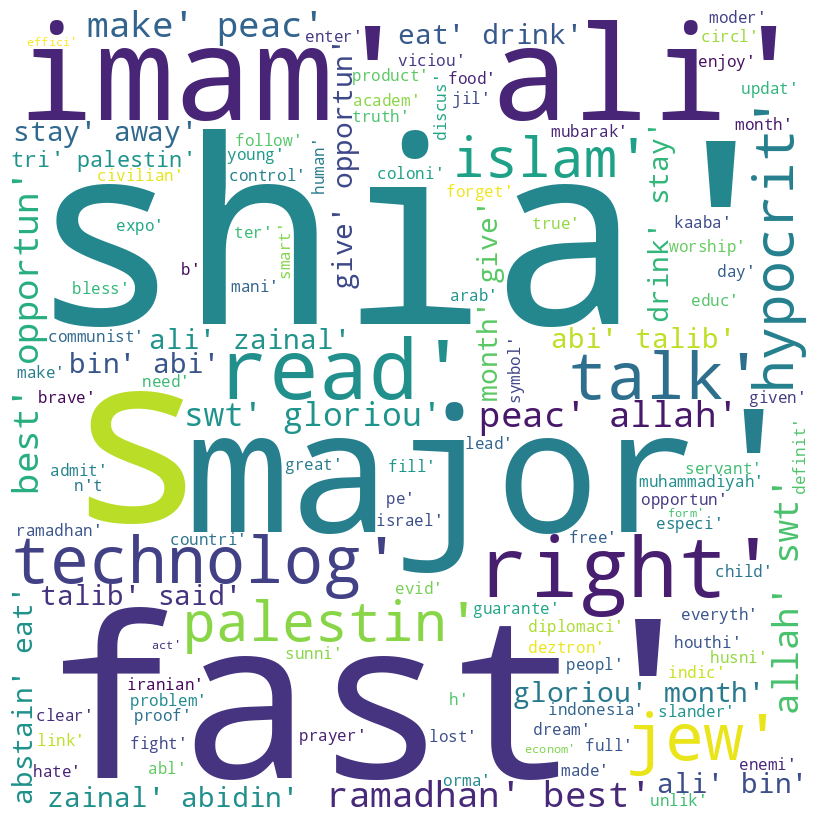

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in wc_positif.text_lemmatized_clean2:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
rel_freq=wordcloud.words_
#rel_freq

list(rel_freq.items())[:]

[("shia'", 1.0),
 ('s', 0.875),
 ("fast'", 0.75),
 ("major'", 0.75),
 ("imam' ali'", 0.5),
 ("right'", 0.25),
 ("read'", 0.25),
 ("technolog'", 0.25),
 ("talk'", 0.25),
 ("jew'", 0.25),
 ("palestin'", 0.25),
 ("hypocrit'", 0.25),
 ("islam'", 0.25),
 ("ramadhan' best'", 0.25),
 ("best' opportun'", 0.25),
 ("make' peac'", 0.25),
 ("peac' allah'", 0.25),
 ("allah' swt'", 0.25),
 ("swt' gloriou'", 0.25),
 ("gloriou' month'", 0.25),
 ("month' give'", 0.25),
 ("give' opportun'", 0.25),
 ("ali' zainal'", 0.25),
 ("zainal' abidin'", 0.25),
 ("ali' bin'", 0.25),
 ("bin' abi'", 0.25),
 ("abi' talib'", 0.25),
 ("talib' said'", 0.25),
 ("abstain' eat'", 0.25),
 ("eat' drink'", 0.25),
 ("drink' stay'", 0.25),
 ("stay' away'", 0.25),
 ("tri' palestin'", 0.25),
 ("month'", 0.125),
 ("ramadhan'", 0.125),
 ("opportun'", 0.125),
 ("make'", 0.125),
 ("servant'", 0.125),
 ("discus'", 0.125),
 ("worship'", 0.125),
 ("day'", 0.125),
 ("prayer'", 0.125),
 ("full'", 0.125),
 ("enjoy'", 0.125),
 ("follow'", 0.

In [ ]:
wc_netral = dfclean[dfclean['label'] == 'netral']
wc_netral

,Unnamed: 0,pengguna,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,text_lemmatized,polarity,label,text_lemmatized_clean2,text_lemmatized_clean
1,1,fhyetan,@Nebuchanedzar_I @mudasir_11 @UpdateBolabola G...,Gua kira itu bukan orang islam tapi Syiah jadi...,I don't think it's Muslim but Shia so don't be...,i don't think it's muslim but shia so don't be...,"['i', 'do', ""n't"", 'think', 'it', ""'s"", 'musli...","[('i', 'NNS'), ('do', 'VBP'), (""n't"", 'RB'), (...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...",0.0,netral,"[""n't"", 'think', ""'s"", 'muslim', 'shia', ""n't""...","["" n' t "", ' t h i n k', ""' s "", ' m u s l..."
2,2,MHHBJA2005,Genap 8 tahun buat serangan pencerobohan ke at...,Genap tahun buat serangan pencerobohan ke atas...,"It's been a year since the invasion of Yemen, ...","it's been a year since the invasion of yemen, ...","['it', ""'s"", 'been', 'a', 'year', 'since', 'th...","[('it', 'PRP'), (""'s"", 'VBZ'), ('been', 'VBN')...","[""'s"", 'year', 'since', 'invasion', 'yemen', '...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...",0.0,netral,"[""'s"", 'year', 'sinc', 'invas', 'yemen', ',', ...","[""' s "", ' y e a r', ' s i n c e', ' i n v ..."
3,3,HarryRusuh2,@NdaJoesh @HarryRidwan__Ay Mudah mudahan. Tera...,Mudah mudahan Terakhir sebelom suspend Tadi ny...,"Hopefully, lastly, before being suspended, I'v...","hopefully, lastly, before being suspended, i'v...","['hopefully', ',', 'lastly', ',', 'before', 'b...","[('hopefully', 'RB'), (',', ','), ('lastly', '...","['hopefully', ',', 'lastly', ',', 'suspended',...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...","['hope', ',', 'lastli', ',', 'suspend', ',', ""...",0.0,netral,"['hope', ',', 'lastli', ',', 'suspend', ',', ""...","[' h o p e f u l l y', ',', ' l a s t l y', ..."
4,4,ahmaddiontri,"@andy24670125 @fadlizon Wkwkwk, padahal Saudi ...",Wkwkwk padahal Saudi hanya back up pemerintaha...,Wkwkwk even though the Saudis only back up the...,wkwkwk even though the saudis only back up the...,"['wkwkwk', 'even', 'though', 'the', 'saudis', ...","[('wkwkwk', 'NN'), ('even', 'RB'), ('though', ...","['wkwkwk', 'even', 'though', 'saudis', 'back',...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...","['wkwkwk', 'even', 'though', 'saudi', 'back', ...",0.0,netral,"['wkwkwk', 'even', 'though', 'saudi', 'back', ...","[' w k w k w k', ' e v e n', ' t h o u g h',..."
6,6,youdie_HIMMLER,RT @CeritaPuspa: Aku tuch orangnya gak pelit f...,Aku tuch orangnya gak pelit follow amp gak pe...,I'm not a stingy person following & not stingy...,i'm not a stingy person following & not stingy...,"['i', ""'m"", 'not', 'a', 'stingy', 'person', 'f...","[('i', 'NN'), (""'m"", 'VBP'), ('not', 'RB'), ('...","[""'m"", 'stingy', 'person', 'following', '&', '...","[""'m"", 'stingi', 'person', 'follow', '&', 'sti...","[""'m"", 'stingi', 'person', 'follow', '&', 'sti...",0.0,netral,"[""'m"", 'stingi', 'person', 'follow', '&', 'sti...","[""' m "", ' s t i n g y', ' p e r s o n', ' ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,53,Terasing,@AliefMohamad Jangan angkuh dan sombong. Semak...,Jangan angkuh dan sombong Semak balik takrif S...,Khawarij Wahhabi Takfiri amp Shia also have th...,khawarij wahhabi takfiri amp shia also have th...,"['khawarij', 'wahhabi', 'takfiri', 'amp', 'shi...","[('khawarij', 'NN'), ('wahhabi', 'NN'), ('takf...","['khawarij', 'wahhabi', 'takfiri', 'amp', 'shi...","['khawarij', 'wahhabi', 'takfiri', 'amp', 'shi...","['khawarij', 'wahhabi', 'takfiri', 'amp', 'shi...",0.0,netral,"['khawarij', 'wahhabi', 'takfiri', 'amp', 'shi...","[' k h a w a r i j', ' w a h h a b i', ' t a..."
113,54,AliefMohamad,Apa la yang menyebabkan anda try hard sangat s...,Apa la yang menyebabkan anda try hard sangat s...,The archipelago is the two is

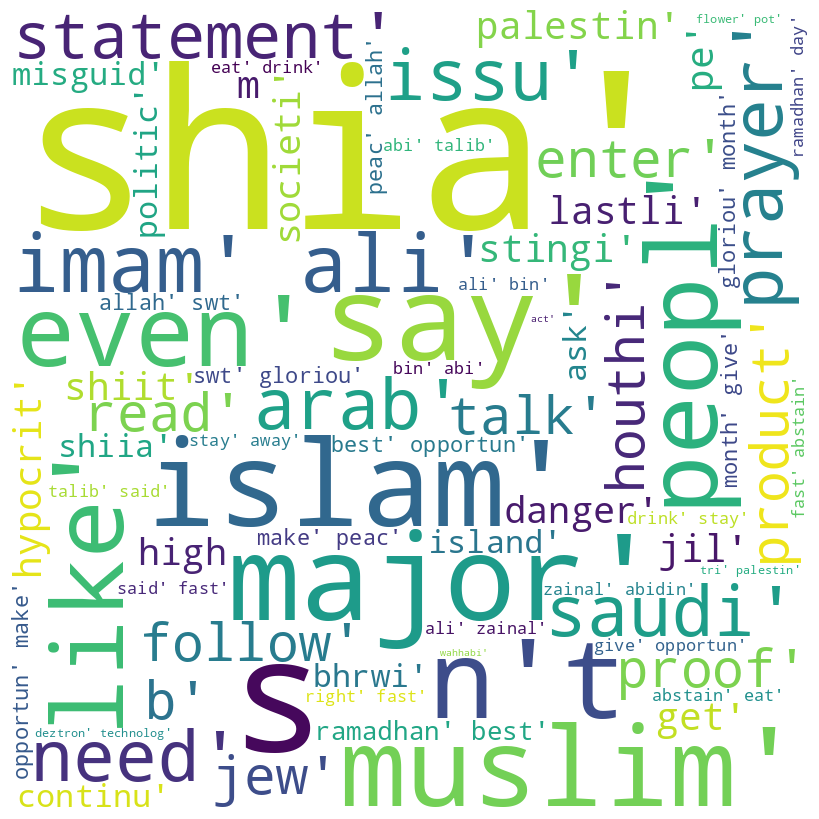

In [ ]:
omment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in wc_netral.text_lemmatized_clean2:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
rel_freq=wordcloud.words_
#rel_freq

list(rel_freq.items())[:]

[("shia'", 1.0),
 ('s', 0.4444444444444444),
 ("major'", 0.2222222222222222),
 ("islam'", 0.2222222222222222),
 ("say'", 0.2222222222222222),
 ("n't", 0.18518518518518517),
 ("muslim'", 0.18518518518518517),
 ("peopl'", 0.14814814814814814),
 ("even'", 0.14814814814814814),
 ("like'", 0.14814814814814814),
 ("imam' ali'", 0.14814814814814814),
 ("prayer'", 0.1111111111111111),
 ("need'", 0.1111111111111111),
 ("arab'", 0.1111111111111111),
 ("saudi'", 0.1111111111111111),
 ("issu'", 0.1111111111111111),
 ("statement'", 0.1111111111111111),
 ("read'", 0.07407407407407407),
 ("follow'", 0.07407407407407407),
 ("houthi'", 0.07407407407407407),
 ("product'", 0.07407407407407407),
 ("b'", 0.07407407407407407),
 ("enter'", 0.07407407407407407),
 ("proof'", 0.07407407407407407),
 ("talk'", 0.07407407407407407),
 ("jew'", 0.07407407407407407),
 ("palestin'", 0.07407407407407407),
 ("pe'", 0.07407407407407407),
 ("hypocrit'", 0.07407407407407407),
 ("jil'", 0.07407407407407407),
 ("lastli'", 0.